In [3]:
import pandas as pd
import numpy as np
import random


In [4]:
restos_df = pd.read_csv("zomato_restos_new.csv")
restos_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   resto_id  816 non-null    int64 
 1   name      816 non-null    object
 2   dishes    816 non-null    object
dtypes: int64(1), object(2)
memory usage: 19.2+ KB


In [5]:
restos_df.head()

,resto_id,name,dishes
0,0,Sangeeta's Kitchen,"Chicken Dum Biryani [1 Kg],Chicken Pulav [1 Kg..."
1,1,Vrindavan,"Veg Grilled Sandwich,Grilled Cheese Sandwich,V..."
2,2,Cakes & Candies,"Black Forest Cream Cake [2 kg],Belgium Chocol..."
3,3,Boojee Cafe,"Truffled Avocado Toast,Truffled Scramble Eggs,..."
4,4,Cake Walkers,"Belgium Chocolate Cake [1 kg],Death by Chocola..."


In [6]:
restos_df.shape

(816, 3)

## Normalizing the dishes

In [7]:
restos_df["dishes"] = restos_df["dishes"].str.lower()

In [8]:
restos_df.head()

,resto_id,name,dishes
0,0,Sangeeta's Kitchen,"chicken dum biryani [1 kg],chicken pulav [1 kg..."
1,1,Vrindavan,"veg grilled sandwich,grilled cheese sandwich,v..."
2,2,Cakes & Candies,"black forest cream cake [2 kg],belgium chocol..."
3,3,Boojee Cafe,"truffled avocado toast,truffled scramble eggs,..."
4,4,Cake Walkers,"belgium chocolate cake [1 kg],death by chocola..."


In [9]:
import nltk

In [10]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/apple/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/apple/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
restos_df["dishes"] = restos_df["dishes"].map(lambda x: nltk.word_tokenize(x))

In [12]:
restos_df.head()

,resto_id,name,dishes
0,0,Sangeeta's Kitchen,"[chicken, dum, biryani, [, 1, kg, ], ,, chicke..."
1,1,Vrindavan,"[veg, grilled, sandwich, ,, grilled, cheese, s..."
2,2,Cakes & Candies,"[black, forest, cream, cake, [, 2, kg, ], ,, b..."
3,3,Boojee Cafe,"[truffled, avocado, toast, ,, truffled, scramb..."
4,4,Cake Walkers,"[belgium, chocolate, cake, [, 1, kg, ], ,, dea..."


In [13]:
porter = nltk.PorterStemmer()

In [14]:
lancaster = nltk.LancasterStemmer()

In [15]:
wnl = nltk.WordNetLemmatizer()

In [16]:
restos_df["dishes"] = restos_df["dishes"].map(lambda x: [porter.stem(t) for t in x])

In [17]:
restos_df.head()

,resto_id,name,dishes
0,0,Sangeeta's Kitchen,"[chicken, dum, biryani, [, 1, kg, ], ,, chicke..."
1,1,Vrindavan,"[veg, grill, sandwich, ,, grill, chees, sandwi..."
2,2,Cakes & Candies,"[black, forest, cream, cake, [, 2, kg, ], ,, b..."
3,3,Boojee Cafe,"[truffl, avocado, toast, ,, truffl, scrambl, e..."
4,4,Cake Walkers,"[belgium, chocol, cake, [, 1, kg, ], ,, death,..."


In [18]:
restos_df["dishes"] = restos_df["dishes"].map(lambda x: ' '.join(map(str, x)))

In [19]:
restos_df.head()

,resto_id,name,dishes
0,0,Sangeeta's Kitchen,"chicken dum biryani [ 1 kg ] , chicken pulav [..."
1,1,Vrindavan,"veg grill sandwich , grill chees sandwich , ve..."
2,2,Cakes & Candies,"black forest cream cake [ 2 kg ] , belgium cho..."
3,3,Boojee Cafe,"truffl avocado toast , truffl scrambl egg , av..."
4,4,Cake Walkers,"belgium chocol cake [ 1 kg ] , death by chocol..."


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel 

In [21]:
tf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tf.fit_transform(restos_df['dishes'])

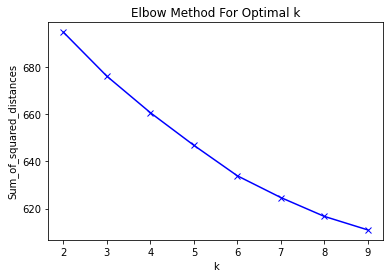

In [22]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(tfidf_matrix)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [23]:
true_k = 7
title = restos_df["name"]
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(tfidf_matrix)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                      title  cluster
569        Stir Fry Express        0
743             Hot Chillis        0
482                Hakkasan        0
622             Asian Touch        0
667      Tiffanys Resto Bar        0
..                      ...      ...
291         Anna Dosa Point        6
65   Sridevi Veg Restaurant        6
55              Banana Leaf        6
45         Manohar Pure Veg        6
347        Sujata Veg Treat        6

[816 rows x 2 columns]


Cluster: 0
Titles
                        Home Deli
                     Hotel Mahesh
                        Moms Cafe
                Bhot Hard Chinese
                Hong Kong Chinese
                       99 Chinese
                    A One Chinese
                  National Bakery
                The Great Chinese
                  Express Chinese
              Your Choice Chinese
                      Hub Chinese
           A To Z Sweets & Snacks
              New R.M. Restaurant
               Dark Night Kitchen
                       Food Point
                         Chi-Nice
          Three Star Food Express
                        China Man
                           Machao
      Spoonwise- The Organic Cafe
                  The Food House 
               Diamond Restaurant
                        Mumbai 54
                Homemade Junction
            Al Barkat Food Corner
                    Molten Cheese
                    Bey's Kitchen
                Hotel Suba Gal

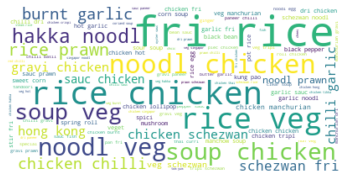

Cluster: 1
Titles
                               Cakes & Candies
                                  Cake Walkers
                                     Theobroma
               KCROASTERS - A Koinonia Project
                        Trupti Farsan & Sweets
 Purshottam Kandoi Haribhai Damodar Mithaiwala
                                       Heerson
                      Anupam Sweets And Farsan
                                       Birdy's
                         Annapurna Farsan Mart
                        Cake Bakebon Live Cake
                                 Tosita Bakery
                                   Sweet Truth
                              The Bakers Table
                    Bangalore Iyangar's Bakery
                                      Monginis
                       World Of Cakes & Snacks
                                  Tasty Corner
                                  Live Baker's
                                  Cake Factory
                       Zam Zam Sweets & Ba

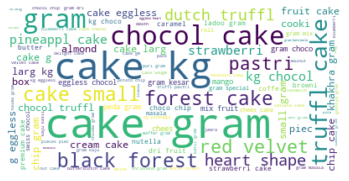

Cluster: 2
Titles
                Blue Tokai Coffee Roasters
                         The Baker's Dozen
                                Oye Kiddan
             Poetry by Love and Cheesecake
                  Chaayos - Meri Wali Chai
                            The Nutcracker
                              Sweet Bengal
                            The Yoga House
                      Shree Krishna Chhaya
                         Udipi Refreshment
                               Apple A Day
                                    Subway
                          Lucky Restaurant
                   Tewari Bros. Mithaiwala
                                       Vig
                    The Belgian Waffle Co.
                           Chai Pe Charcha
                        Coffee By Di Bella
           Thepla House by Tejal's kitchen
                      Ekadashi Upahargruha
                      Great Indian Khichdi
                            Baskin Robbins
                          Starbucks 

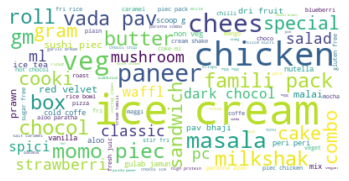

Cluster: 3
Titles
                          Boojee Cafe
                       The Bagel Shop
                  Bombay Coffee House
                           Shiv Sagar
                        Radha Krishna
                           Sandwizzaa
                       Kumar Sandwich
                      Kurla Juicy Hut
         A.B.C.D - Any Body Can Drool
              Sadguru Sandwich Centre
               Curry And Combos Twist
                       Gupta Sandwich
                          Balaji Cafe
                       Om Sai Frankie
                            A1 Franky
               The Sandwich Mania Co.
                 Fine Touch Fast Food
                         Tangy Gossip
                         DN Food Zone
                   Kirti Mahal Snacks
                       Pranavs Corner
                       Chai Sutta Bar
                     Gupta's SnackHub
                      Fast Food Villa
 Sai Krupa Sandwich And Snacks Centre
               Sandwich  Coffee 

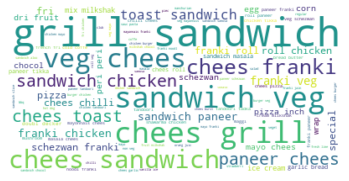

Cluster: 4
Titles
                      Sangeeta's Kitchen
                        Cafe Irani Chaii
                               Mac Craig
                         Canteen Central
                         Biryani By Kilo
                         Chaudhary Tadka
                             Eat Healthy
                          Famous Biryani
                        Maushi's Kitchen
                        Jaspal Di Bhatti
 Shree Chittari Hospitality Services LLP
            Cafe Sagar Restaurant & Seek
                             Shree Foods
                         Alcons Delicacy
                                  Kozzby
                            W Food Court
                             Cam Sllenor
                          Flying Turbaan
                       Thalis And Combos
                          Beeji Ki Rasoi
                             Hurry Curry
                              Cafe Sahil
                          Tibb's Frankie
                            Burgundy Bo

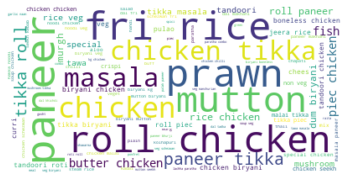

Cluster: 5
Titles
                  Nothing But Chicken
                              Fuel Up
                           McDonald's
          Birdsong - The Organic Cafe
                          Burger King
                              Pishu's
              Earth Cafe @ Waterfield
                      Happie Calories
                 Aromas Cafe & Bistro
                            FreshMenu
                               Faasos
                      Firangi Burgers
              Aqua - Sun N Sand Hotel
                     Deli By The Blue
                        Bae's Kitchen
                       Easyhuman Cafe
                       La Cane Bistro
            Jumboking - Indian Burger
                               Pomona
                           Fire Wings
                         Boss Chinese
                 Bombay Pizza Company
                           Papa Pizza
                           The Burger
                     Keshav Fast Food
                            Blac

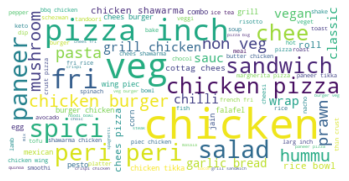

Cluster: 6
Titles
                   Vrindavan
    Spukies - The Veg Sigree
              Madras Diaries
                 Arya Bhavan
       Amrut Sagar Fast Food
            N P Iyer Kitchen
                        Elco
                 Anand Stall
            Manohar Pure Veg
             Hotel Sudarshan
                 Banana Leaf
      Sridevi Veg Restaurant
            Southern Delight
 Shubham Pure Veg Restaurant
       Satkar Veg Restaurant
         Anna's Tasty Corner
           Tasty Treat India
             N P Iyer Bhavan
              Mani Delicious
     Shedge Fast Food Corner
                 Super South
                Rama Krishna
                 Shubh Sagar
    Mumbai Ki Masti Vada Pav
                     Modakam
             Nashta And More
                     Thambbi
             Anna Dosa Point
         Sainath Dosa Center
            Sujata Veg Treat
                     Shabari
                   Sai Sagar
                Amazing Dosa
  Shree Krishna Refreshme

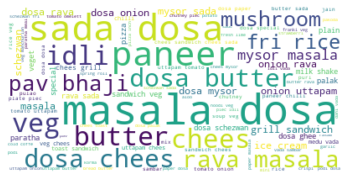

In [24]:
from wordcloud import WordCloud
result={'cluster':labels,'dishes':restos_df["dishes"]}
result=pd.DataFrame(result)
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['dishes'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   print('Titles')
   titles=wiki_cl[wiki_cl.cluster==k]['title']         
   print(titles.to_string(index=False))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()

In [25]:
tfidf_matrix.shape

(816, 7711)